# Understanding results for overall model

## Prepare results table

In [1]:
import pipeline as pp
import pandas as pd
import config

In [2]:
# Concatenate results from different years into one dataframe
def get_all_results(file, test_years):
    results = pd.read_csv(file+str(test_years[0])+'.csv')

    for year in test_years[1:]:
        df = pd.read_csv(file+str(year)+'.csv')
        results = results.append(df, ignore_index=True)
    
    return results

test_years = list(range(2010,2018))
time_col = config.TRAIN_TEST_COL

In [3]:
# Overall Model
file = "results/results_"
results = get_all_results(file, test_years)

# Get the results by gender/combined
results_overall = results[results['gender']=='TOTAL']
results_male = results[results['gender']=='MALE']
results_female = results[results['gender']=='FEMALE']

print(len(results_overall))
print(len(results_female))
print(len(results_male))

864
864
864


In [4]:
# Male Model
file = "results/MALE_results_"
male = get_all_results(file, test_years)
# results from 2014 is still incomplete
len(male)

864

In [5]:
# Female Model
file = "results/FEMALE_results_"

female = get_all_results(file, test_years)
len(female) # 8 x 108 models

864

In [6]:
results.columns

Index(['year', 'gender', 'model', 'classifiers', 'parameters',
       'train_set_size', 'num_features', 'validation_set_size', 'baseline',
       'auc', 'accuracy_1', 'precision_1', 'recall_1', 'f1_1', 'accuracy_2',
       'precision_2', 'recall_2', 'f1_2', 'accuracy_5', 'precision_5',
       'recall_5', 'f1_5', 'accuracy_10', 'precision_10', 'recall_10', 'f1_10',
       'accuracy_20', 'precision_20', 'recall_20', 'f1_20', 'accuracy_30',
       'precision_30', 'recall_30', 'f1_30', 'accuracy_50', 'precision_50',
       'recall_50', 'f1_50'],
      dtype='object')

## Get best model by train-test sets

In [7]:
cols = ['year', 'baseline', 'accuracy_10', 'recall_10', 'precision_10', 'f1_10', 'auc', 'classifiers','parameters']
metric = 'recall_10'


# Get highest recall by each of the train-test sets
print('combined model')
best_models = pp.get_best_models(results_overall, time_col, test_years, cols, metric)
print()

print('male model')
best_male = pp.get_best_models(male, time_col, test_years, cols, metric)
print()

print('female model')
best_female = pp.get_best_models(female, time_col, test_years, cols, metric)
print()

combined model
For train-test set 2010, highest recall_10 attained is 0.4626278520849725
For train-test set 2011, highest recall_10 attained is 0.4708333333333333
For train-test set 2012, highest recall_10 attained is 0.51772063933287
For train-test set 2013, highest recall_10 attained is 0.5308641975308642
For train-test set 2014, highest recall_10 attained is 0.5841223597960671
For train-test set 2015, highest recall_10 attained is 0.6104695919938414
For train-test set 2016, highest recall_10 attained is 0.6177498252969951
For train-test set 2017, highest recall_10 attained is 0.7150225659999999

male model
For train-test set 2010, highest recall_10 attained is 0.4480737018425461
For train-test set 2011, highest recall_10 attained is 0.4641909814323608
For train-test set 2012, highest recall_10 attained is 0.4881481481481482
For train-test set 2013, highest recall_10 attained is 0.5180630284396618
For train-test set 2014, highest recall_10 attained is 0.593042071197411
For train-test

In [8]:
# Overall best recall at 10%
best_models

,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
243,2010,0.073050,0.894534,0.462628,0.337931,0.390568,0.888525,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
567,2011,0.067473,0.896092,0.470833,0.317773,0.379449,0.886899,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
891,2012,0.082968,0.902964,0.517721,0.429642,0.469587,0.910329,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1215,2013,0.091831,0.905650,0.530864,0.487406,0.508207,0.918653,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1539,2014,0.087581,0.914716,0.584122,0.511480,0.545393,0.934630,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1869,2015,0.082723,0.918296,0.610470,0.505096,0.552806,0.940159,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
2187,2016,0.091654,0.921604,0.617750,0.566304,0.590909,0.952356,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
2517,2017,0.094996,0.940834,0.715023,0.679118,0.696608,0.973741,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."


In [9]:
# For males and females in overall

def get_overall_by_gender(gender_df, best_df, time_col, test_years):
    best_overall = pd.DataFrame(columns=cols)
    for year in test_years:
        gender_yr = gender_df[gender_df[time_col]==year]
        best = best_df[best_df[time_col]==year]['parameters'].values
        for val in best:
            result = gender_yr[gender_yr['parameters']== val][cols]
            best_overall = best_overall.append(result)
    return best_overall

best_overall_m = get_overall_by_gender(results_male, best_models, time_col, test_years)
best_overall_f = get_overall_by_gender(results_female, best_models, time_col, test_years)

In [10]:
best_overall_m

,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
244,2010,0.073050,0.893129,0.455611,0.351194,0.396646,0.885312,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
568,2011,0.067473,0.893576,0.455349,0.327192,0.380776,0.882043,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
892,2012,0.082968,0.900130,0.500741,0.437824,0.467173,0.906560,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1216,2013,0.091831,0.903519,0.518832,0.482833,0.500185,0.914105,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1540,2014,0.087581,0.912999,0.572816,0.512301,0.540871,0.933031,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1870,2015,0.082723,0.916448,0.597741,0.502190,0.545815,0.936952,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
2188,2016,0.091654,0.918961,0.603896,0.550703,0.576074,0.949652,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
2518,2017,0.094996,0.939063,0.702443,0.677857,0.689931,0.973008,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."


In [11]:
best_overall_f

,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
245,2010,0.073050,0.901810,0.522388,0.192308,0.281124,0.914035,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
569,2011,0.067473,0.906599,0.606557,0.187817,0.286822,0.921433,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
893,2012,0.082968,0.917853,0.698795,0.316940,0.436090,0.942196,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1217,2013,0.091831,0.924217,0.644737,0.538462,0.586826,0.951827,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1541,2014,0.087581,0.928134,0.704000,0.488889,0.577049,0.948046,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1871,2015,0.082723,0.929126,0.697183,0.512953,0.591045,0.958623,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
2189,2016,0.091654,0.938626,0.700508,0.673171,0.686567,0.967132,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
2519,2017,0.094996,0.951306,0.795918,0.690265,0.739336,0.977555,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."


In [12]:
best_male

,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
81,2010,0.077298,0.891967,0.448074,0.345384,0.390084,0.883752,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
189,2011,0.072020,0.894847,0.464191,0.333545,0.388170,0.881719,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
297,2012,0.087382,0.897927,0.488148,0.426813,0.455425,0.905731,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
405,2013,0.092914,0.903376,0.518063,0.482117,0.499444,0.914397,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
433,2014,0.089901,0.916618,0.593042,0.530391,0.559969,0.933618,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
544,2015,0.084023,0.914842,0.588184,0.494161,0.537088,0.906743,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1', 'random_state': 0}"
729,2016,0.091003,0.918665,0.602273,0.549223,0.574526,0.950123,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
837,2017,0.096318,0.937062,0.692080,0.667857,0.679753,0.971289,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
839,2017,0.096318,0.937062,0.692080,0.667857,0.679753,0.972364,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."


In [13]:
best_female

,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
92,2010,0.040251,0.908393,0.611940,0.225275,0.329317,0.914545,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
189,2011,0.033724,0.908629,0.639344,0.197970,0.302326,0.912739,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
315,2012,0.046744,0.921139,0.734940,0.333333,0.458647,0.938117,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 5, 'min_..."
316,2012,0.046744,0.921139,0.734940,0.333333,0.458647,0.938117,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 5, 'min_..."
404,2013,0.082850,0.929709,0.677632,0.565934,0.616766,0.948200,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
505,2014,0.073616,0.927019,0.696000,0.483333,0.570492,0.928048,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'log2', 'min..."
511,2014,0.073616,0.927019,0.696000,0.483333,0.570492,0.927727,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'log2', 'min..."
621,2015,0.074037,0.928091,0.690141,0.507772,0.585075,0.951290,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
738,2016,0.094717,0.934730,0.680203,0.653659,0.666667,0.937961,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
839,2017,0.085874,0.949535,0.785714,0.681416,0.729858,0.974480,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."


#### Top-k best models

In [14]:
# Overall Models
metric = 'recall_10'
top_k = 10
cols = ['gender'] + cols

def get_top_k(df, time_col, test_years):
    df_topk = pd.DataFrame(columns=cols)
    for year in test_years:
        df_yr = df[df[time_col]==year]
        topk = pp.sort_models(df_yr, metric, top_k, cols)
        df_topk = df_topk.append(topk)
    return df_topk

overall_topk = get_top_k(results_overall, time_col, test_years)
male_topk = get_top_k(male, time_col, test_years)
female_topk = get_top_k(female, time_col, test_years)


In [15]:
overall_topk

,gender,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
243,TOTAL,2010,0.073050,0.894534,0.462628,0.337931,0.390568,0.888525,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
240,TOTAL,2010,0.073050,0.891890,0.444532,0.324713,0.375291,0.879323,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
192,TOTAL,2010,0.073050,0.891086,0.439024,0.320690,0.370641,0.872617,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
15,TOTAL,2010,0.073050,0.890626,0.435877,0.318391,0.367984,0.855958,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2', 'random_state': 0}"
312,TOTAL,2010,0.073050,0.890166,0.432730,0.316092,0.365327,0.876059,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
249,TOTAL,2010,0.073050,0.890051,0.431943,0.315517,0.364663,0.882802,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
246,TOTAL,2010,0.073050,0.889936,0.431157,0.314943,0.363999,0.879756,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
12,TOTAL,2010,0.073050,0.889821,0.430370,0.314368,0.363334,0.858799,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1', 'random_state': 0}"
264,TOTAL,2010,0.073050,0.889821,0.430370,0.314368,0.363334,0.872329,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 5, 'min_sam..."
267,TOTAL,2010,0.073050,0.889821,0.430370,0.314368,0.363334,0.872329,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 5, 'min_sam..."


In [16]:
male_topk

,gender,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
81,MALE,2010,0.077298,0.891967,0.448074,0.345384,0.390084,0.883752,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
80,MALE,2010,0.077298,0.890934,0.441374,0.340219,0.384251,0.876487,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
83,MALE,2010,0.077298,0.888351,0.424623,0.327308,0.369668,0.880401,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
2,MALE,2010,0.077298,0.887963,0.422111,0.325371,0.367481,0.855630,"LogisticRegression(C=0.1, class_weight=None, d...","{'C': 0.1, 'penalty': 'l1', 'random_state': 0}"
82,MALE,2010,0.077298,0.887963,0.422111,0.325371,0.367481,0.876910,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
92,MALE,2010,0.077298,0.887576,0.419598,0.323434,0.365293,0.873182,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
3,MALE,2010,0.077298,0.887447,0.418760,0.322789,0.364564,0.850052,"LogisticRegression(C=0.1, class_weight=None, d...","{'C': 0.1, 'penalty': 'l2', 'random_state': 0}"
4,MALE,2010,0.077298,0.887447,0.418760,0.322789,0.364564,0.855118,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1', 'random_state': 0}"
64,MALE,2010,0.077298,0.887188,0.417085,0.321498,0.363106,0.868594,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
87,MALE,2010,0.077298,0.887188,0.417085,0.321498,0.363106,0.867910,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 5, 'min_sam..."


In [17]:
female_topk

,gender,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
92,FEMALE,2010,0.040251,0.908393,0.611940,0.225275,0.329317,0.914545,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
91,FEMALE,2010,0.040251,0.907296,0.597015,0.219780,0.321285,0.906368,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
90,FEMALE,2010,0.040251,0.906199,0.582090,0.214286,0.313253,0.897414,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
99,FEMALE,2010,0.040251,0.906199,0.582090,0.214286,0.313253,0.909734,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 5, 'min_..."
100,FEMALE,2010,0.040251,0.906199,0.582090,0.214286,0.313253,0.909734,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 5, 'min_..."
102,FEMALE,2010,0.040251,0.905101,0.567164,0.208791,0.305221,0.897146,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
103,FEMALE,2010,0.040251,0.905101,0.567164,0.208791,0.305221,0.896266,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
80,FEMALE,2010,0.040251,0.905101,0.567164,0.208791,0.305221,0.906682,GradientBoostingClassifier(criterion='friedman...,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
105,FEMALE,2010,0.040251,0.905101,0.567164,0.208791,0.305221,0.814831,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."
106,FEMALE,2010,0.040251,0.905101,0.567164,0.208791,0.305221,0.829969,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."


## Get Stability Score

In [18]:
# Overall Model
cols_stability = ['accuracy_10', 'recall_10', 'precision_10', 'f1_10', 'auc', 'classifiers', 'parameters']
results_by_year = [results_overall[results_overall[time_col]==year] for year in test_years]
overall_stability = pp.get_stability_score(results_by_year, metric, cols_stability)
overall_stability

,,accuracy_10,recall_10,precision_10,f1_10,auc,rank
classifiers,parameters,,,,,,
"GradientBoostingClassifier(criterion='friedman_mse', init=None,\n learning_rate=0.1, loss='deviance', max_depth=5,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=100,\n n_iter_no_change=None, presort='auto', random_state=0,\n subsample=0.5, tol=0.0001, validation_fraction=0.1,\n verbose=0, warm_start=False)","{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}",0.911504,0.561718,0.477684,0.514896,0.925833,0.250
"GradientBoostingClassifier(criterion='friedman_mse', init=None,\n learning_rate=0.1, loss='deviance', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=100,\n n_iter_no_change=None, presort='auto', random_state=0,\n subsample=0.5, tol=0.0001, validation_fraction=0.1,\n verbose=0, warm_start=False)","{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}",0.909731,0.550303,0.468819,0.504950,0.923549,4.875
"GradientBoostingClassifier(criterion='friedman_mse', init=None,\n learning_rate=0.1, loss='deviance', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=10,\n n_iter_no_change=None, presort='auto', random_state=0,\n subsample=0.5, tol=0.0001, validation_fraction=0.1,\n verbose=0, warm_start=False)","{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 10, 'random_state': 0, 'subsample': 0.5}",0.908022,0.540817,0.460275,0.495961,0.920056,6.375
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,\n oob_score=False, random_state=0, verbose=0, warm_start=False)","{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",0.905994,0.530152,0.450131,0.485544,0.907454,10.125
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}",0.907364,0.537127,0.456983,0.492485,0.914217,10.375
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'random_state': 0}",0.907305,0.536665,0.456689,0.492119,0.911113,10.625
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}",0.907347,0.536832,0.456897,0.492311,0.911416,11.250
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, n_e

In [19]:
best_para = "{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}"
results_male[results_male['parameters']==best_para].groupby('parameters').mean()['recall_10']

parameters
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}    0.548929
Name: recall_10, dtype: float64

In [20]:
results_female[results_female['parameters']==best_para].groupby('parameters').mean()['recall_10']

parameters
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}    0.669743
Name: recall_10, dtype: float64

In [21]:
# Male Models
male_by_year = [male[male[time_col] == year] for year in test_years]
male_stability = pp.get_stability_score(male_by_year, metric, cols_stability)
male_stability

,,accuracy_10,recall_10,precision_10,f1_10,auc,rank
classifiers,parameters,,,,,,
"GradientBoostingClassifier(criterion='friedman_mse', init=None,\n learning_rate=0.1, loss='deviance', max_depth=5,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=100,\n presort='auto', random_state=0, subsample=0.5, verbose=0,\n warm_start=False)","{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}",0.909103,0.547411,0.477135,0.508872,0.922278,0.875
"GradientBoostingClassifier(criterion='friedman_mse', init=None,\n learning_rate=0.1, loss='deviance', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=100,\n presort='auto', random_state=0, subsample=0.5, verbose=0,\n warm_start=False)","{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}",0.906318,0.530816,0.463211,0.493764,0.919671,6.625
"GradientBoostingClassifier(criterion='friedman_mse', init=None,\n learning_rate=0.1, loss='deviance', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=10,\n presort='auto', random_state=0, subsample=0.5, verbose=0,\n warm_start=False)","{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 10, 'random_state': 0, 'subsample': 0.5}",0.905582,0.526951,0.459531,0.489994,0.916956,6.750
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,\n oob_score=False, random_state=0, verbose=0, warm_start=False)","{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}",0.903797,0.517357,0.450605,0.480749,0.901147,10.750
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}",0.904844,0.522360,0.455841,0.485911,0.911153,11.875
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,\n oob_score=False, random_state=0, verbose=0, warm_start=False)","{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",0.903376,0.515201,0.448503,0.478616,0.903202,12.000
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,\n oob_score=False, random_state=0, verbose=0, warm_start=False)","{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 50, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",0.903320,0.514757,0.448223,0.478266,0.901485,13.375
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, presort=False, rando

In [22]:
# Female Models
female_by_year = [female[female[time_col] == year] for year in test_years]
female_stability = pp.get_stability_score(female_by_year, metric, cols_stability)
female_stability

,,accuracy_10,recall_10,precision_10,f1_10,auc,rank
classifiers,parameters,,,,,,
"GradientBoostingClassifier(criterion='friedman_mse', init=None,\n learning_rate=0.1, loss='deviance', max_depth=5,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=10,\n presort='auto', random_state=0, subsample=0.5, verbose=0,\n warm_start=False)","{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 10, 'random_state': 0, 'subsample': 0.5}",0.922927,0.659971,0.441204,0.513288,0.939804,6.875
"GradientBoostingClassifier(criterion='friedman_mse', init=None,\n learning_rate=0.1, loss='deviance', max_depth=5,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=100,\n presort='auto', random_state=0, subsample=0.5, verbose=0,\n warm_start=False)","{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}",0.921274,0.650979,0.432943,0.504256,0.940364,10.000
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,\n oob_score=False, random_state=0, verbose=0, warm_start=False)","{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",0.920142,0.634929,0.427271,0.496051,0.933280,12.250
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,\n oob_score=False, random_state=0, verbose=0, warm_start=False)","{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 50, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}",0.919450,0.626371,0.423814,0.491136,0.928970,12.625
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,\n oob_score=False, random_state=0, verbose=0, warm_start=False)","{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 50, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",0.919399,0.629865,0.423555,0.491836,0.931549,14.625
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,\n oob_score=False, random_state=0, verbose=0, warm_start=False)","{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}",0.918986,0.623099,0.421497,0.488719,0.928166,15.625
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}",0.918637,0.627723,0.419769,0.488269,0.925196,15.750
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=10, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=

## Plot Metric Graph over traintest sets

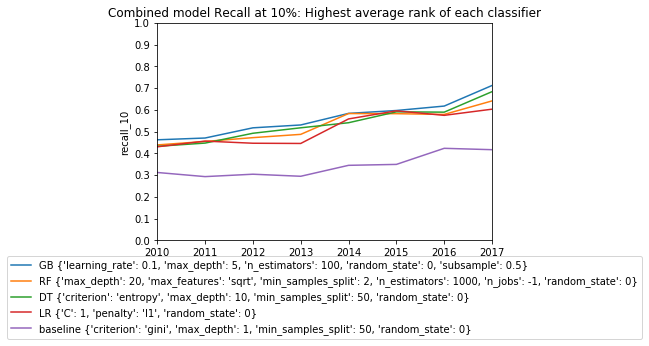

In [23]:
# Overall
metric='recall_10'
baseline=None

model_and_para = [('GB', "{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}"),                 
                  ('RF', "{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}"),
                  ('DT', "{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}"),
                  ('LR', "{'C': 1, 'penalty': 'l1', 'random_state': 0}"),
                  ('baseline', "{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 50, 'random_state': 0}")
                 ]
title='Combined model Recall at 10%: Highest average rank of each classifier'
filename='combined_2010-2017_moststableall'
pp.get_metric_graph(results_overall, metric, model_and_para, baseline, time_col, test_years, title, filename, save=False)                   

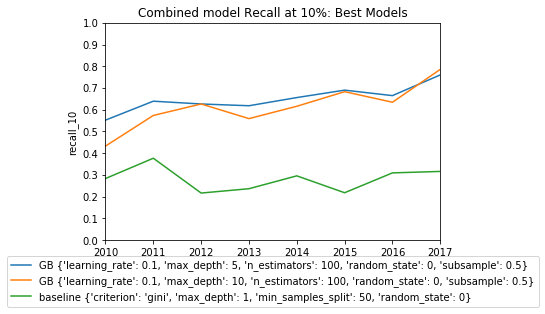

In [24]:
# Overall
model_and_para = [('GB', "{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}"),
                  ('GB', "{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}"),
                  ('baseline', "{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 50, 'random_state': 0}")
                 ]
title='Combined model Recall at 10%: Best Models'
filename='combined_2010-2017_best'
pp.get_metric_graph(female, metric, model_and_para, baseline, time_col, test_years, title, filename, save=False)                   

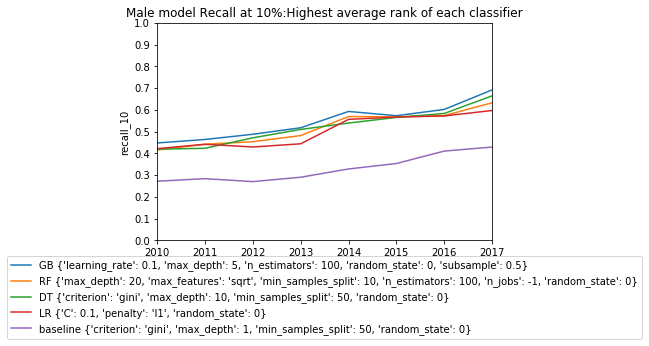

In [25]:
# Male
model_and_para = [('GB', "{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}"),
                  ('RF', "{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}"),
                  ('DT', "{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}"),
                  ('LR', "{'C': 0.1, 'penalty': 'l1', 'random_state': 0}"),
                  ('baseline', "{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 50, 'random_state': 0}")
                 ]
title='Male model Recall at 10%:Highest average rank of each classifier'
filename='male_2010-2017_moststableall'

pp.get_metric_graph(male, metric, model_and_para, baseline, time_col, test_years, title, filename, save=False)                   

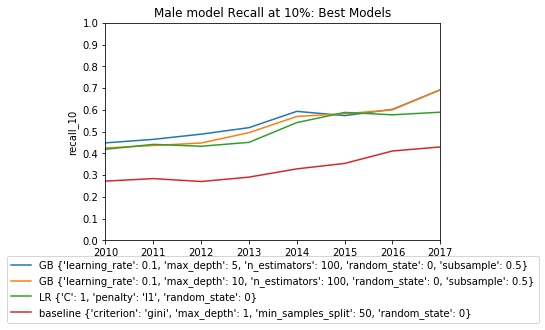

In [26]:
# Male
model_and_para = [('GB', "{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}"),
                  ('GB', "{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}"),
                  ('LR', "{'C': 1, 'penalty': 'l1', 'random_state': 0}"),
                  ('baseline', "{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 50, 'random_state': 0}")
                 ]
title='Male model Recall at 10%: Best Models'
filename='male_2010-2017_best'

pp.get_metric_graph(male, metric, model_and_para, baseline, time_col, test_years, title, filename, save=False)                   

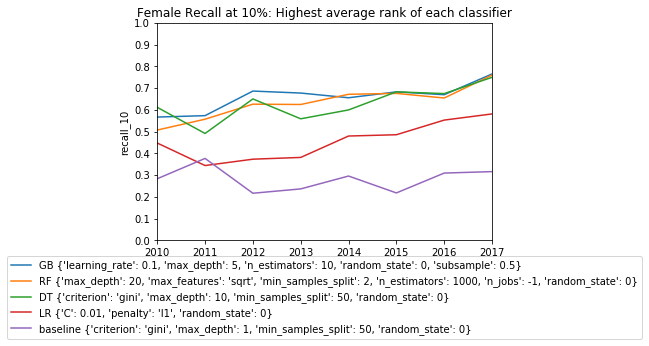

In [27]:
# Female
# Plot of the best model for each classifier
model_and_para = [('GB', "{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 10, 'random_state': 0, 'subsample': 0.5}"),
                  ('RF', "{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}"),
                  ('DT', "{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}"),
                  ('LR', "{'C': 0.01, 'penalty': 'l1', 'random_state': 0}"),
                  ('baseline', "{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 50, 'random_state': 0}")
                 ]
title='Female Recall at 10%: Highest average rank of each classifier'
filename='female_2010-2017_moststableall'
pp.get_metric_graph(female, metric, model_and_para, baseline, time_col, test_years, title, filename, save=False)                   
    

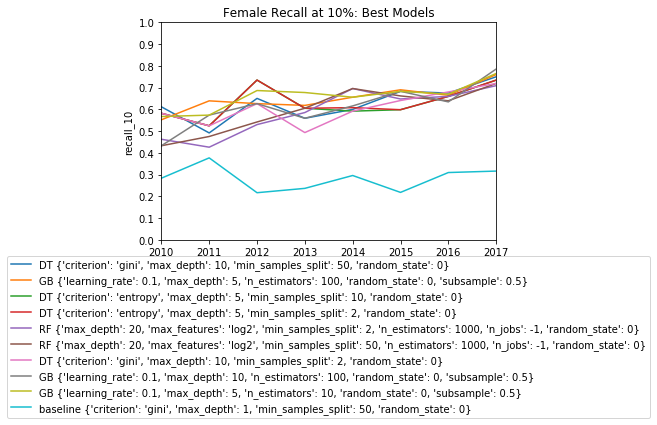

In [28]:
# Female
# Plot best models
model_and_para = [('DT', "{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}"),
                  ('GB', "{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}"),
                  ('DT', "{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10, 'random_state': 0}"),
                  ('DT', "{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2, 'random_state': 0}"),
                  ('RF', "{'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}"),
                  ('RF', "{'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 50, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}"),
                  ('DT', "{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'random_state': 0}"),
                  ('GB', "{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}"),
                  ('GB', "{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 10, 'random_state': 0, 'subsample': 0.5}"),                  
                  ('baseline', "{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 50, 'random_state': 0}")
                 ]
title='Female Recall at 10%: Best Models'
filename='female_2010-2017_best'
pp.get_metric_graph(female, metric, model_and_para, baseline, time_col, test_years, title, filename, save=False)                   

## Feature Importance

In [29]:
pd.read_csv("results/overall/FIMPORTANCE_2017_GB_{'learning_rate'- 0.1, 'max_depth'- 5, 'n_estimators'- 100, 'random_state'- 0, 'subsample'- 0.5}.csv")[['Features', 'Importance']][:10]

,Features,Importance
0,NUM_PREV_INCARCERATION_LAST5YR,0.542747
1,INCARCERATION_LEN_DAYS,0.108393
2,TOTAL_INCARCERATION_ALLPRIOR,0.089835
3,TOTAL_INCARCERATION_LAST5YR,0.030949
4,NUM_PREV_INCARCERATION_ALLPRIOR,0.021365
5,SENTENCING_PENALTY_CLASS_CODE_CRV,0.020555
6,TOTAL_SENT_LAST5YR,0.020037
7,AGE_AT_END_DATE,0.017283
8,AGE_AT_START_DATE,0.010634
9,AVG_INCARCERATION_LAST5YR,0.010245
